# Lecture 11 - Time Series Analysis

## 1. Overview

**Time series analysis** is crucial for financial data, as stock prices, economic indicators, and sales forecasts are often dependent on time. 

**What is Time Series Data?**

- A time series is a sequence of data points recorded at successive and equally spaced points in time.
    - Examples in Finance: Stock prices, interest rates, GDP growth, and exchange rates.

**Components of Time Series Data**
- **Trend:** Long-term increase or decrease in the data.
- **Seasonality:** Repeating patterns or cycles (e.g., sales increasing during the holiday season).
- **Noise/Residual:** Random fluctuations that are not explained by the model.

This notebook covers:

1. The **basics of time series** data and its components.
2. How to **manipulate** and **visualize** time series data with `pandas` and `matplotlib`.
3. Apply **basic time series models** such as **moving averages** and **correlations**.

##### Setting the environment

In [1]:
import numpy as np 
import pandas as pd
from pylab import mpl, plt 
plt.style.use('seaborn-v0_8-dark') 
mpl.rcParams['font.family'] = 'serif' 
%matplotlib inline

## 2. Data inspection

The first part of the analysis is to **inspect** the data set containing the timeseries. 

**Inspection steps:**
1. **Import** data
2. Generate **summary statistics**
3. Analysis **changes over time**
4. Adjust **frequency** (**resampling**)

### 2.1 Data import

For this part, we work with a standard `csv` database obtained from the **Thomson Reuters Eikon Data**. 
The data contains **end-of-day (EOD) price data** for a selection of instruments.

The following parameters apply:
```python
    file_path = 'Data/11/'
    file_name = 'tr_eikon_eod_data.csv'
```

##### Check file

In [2]:
# Data from the Thomson Reuters (TR) Eikon Data API
file_path = 'Data/11/'
file_name = 'tr_eikon_eod_data.csv'
file = open(file_path + file_name, 'r')

In [3]:
file.readlines()[:5]

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n',
 '2010-01-07,30.082827060000003,30.452,20.6,130.0,177.67,114.19,1141.69,19.06,1.4318,1131.9,49.1,110.82\n']

In [4]:
file.close()

##### Import into `dataframe`

In [5]:
# index_col = 0: the first column shall be handled as an index.
# parse_dates = True: the index values are of type datetime.
data = pd.read_csv(file_path + file_name, index_col = 0, parse_dates = True)

- Use **time as label** on `index_col`
- Explicitly interpret as `datetime` object on `parse_dates`
    - from documentation:
        ```If True -> try parsing the index.```


##### Inspect `dataframe`

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   MSFT.O  1972 non-null   float64
 2   INTC.O  1972 non-null   float64
 3   AMZN.O  1972 non-null   float64
 4   GS.N    1972 non-null   float64
 5   SPY     1972 non-null   float64
 6   .SPX    1972 non-null   float64
 7   .VIX    1972 non-null   float64
 8   EUR=    1972 non-null   float64
 9   XAU=    1972 non-null   float64
 10  GDX     1972 non-null   float64
 11  GLD     1972 non-null   float64
dtypes: float64(12)
memory usage: 200.3 KB


In [7]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [8]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2017-10-25,156.41,78.63,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.41,78.76,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.05,83.81,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90
2017-10-30,166.72,83.89,44.37,1110.85,240.89,256.75,2572.83,10.50,1.1649,1275.86,22.76,121.13
2017-10-31,169.04,83.18,45.49,1105.28,242.48,257.15,2575.26,10.18,1.1644,1271.20,22.48,120.67


##### Visualize timeseries

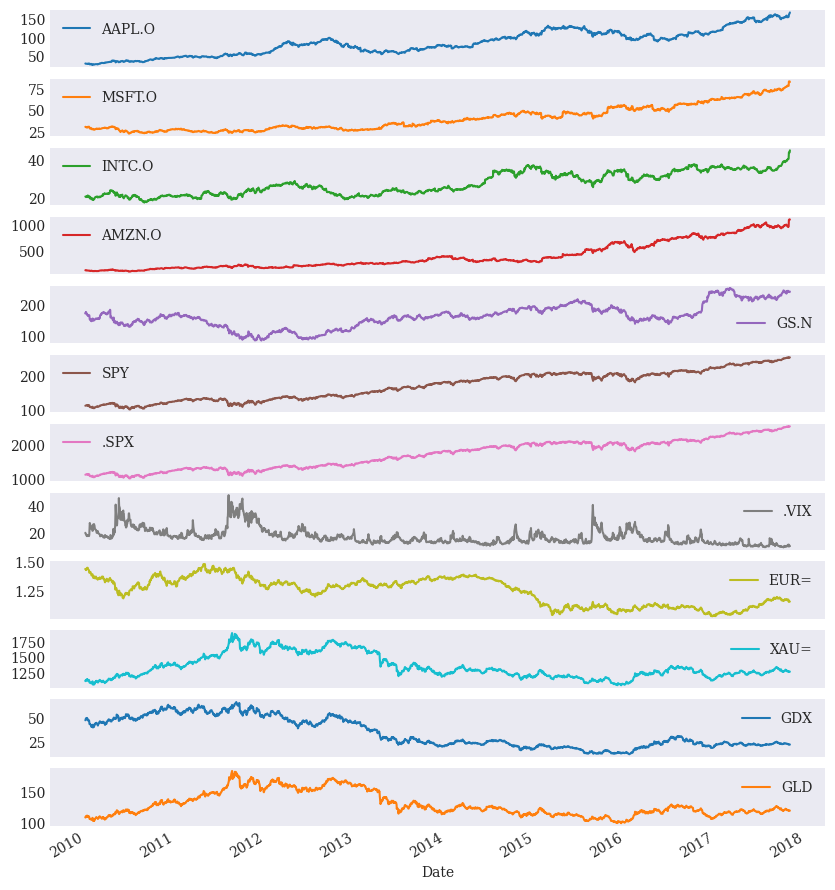

In [9]:
data.plot(figsize = (10,12), subplots = True);

##### Add labels

Labeling from *Reuters Instrument Codes* (RICs)

In [10]:
instruments = ['Apple Stock', 'Microsoft Stock',
                           'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
                           'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
                           'VIX Volatility Index', 'EUR/USD Exchange Rate',
                           'Gold Price', 'VanEck Vectors Gold Miners ETF',
                           'SPDR Gold Trust']

In [11]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


### 2.2 Summary statistics

##### Built-in tools

In [12]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


In [13]:
data.mean()

AAPL.O      86.530152
MSFT.O      40.586752
INTC.O      27.701411
AMZN.O     401.154006
GS.N       163.614625
SPY        172.835399
.SPX      1727.538342
.VIX        17.209498
EUR=         1.252613
XAU=      1352.471593
GDX         34.499391
GLD        130.601856
dtype: float64

##### Customized satistics

In [14]:
data.aggregate(['min', 'mean', 'std', 'median', 'max']).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
median,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


### 2.3 Changes over time

Statistical analysis methods are often based on **changes over time** and not the absolute values themselves. 

There are multiple options to calculate the changes in a time series over time:
- Absolute differences
- Percentage changes
- Logarithmic (log) returns.

#### **Absolute differences**

`.diff()`: subtracts each row’s value from the value in the previous row.

- It reveals the exact change in values from one time step to the next.
- The method returns a `dataframe`

In [15]:
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.23,3.52,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55


In [16]:
data.diff(periods=2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,-0.434285,-0.180,-0.08,-1.65,1.18,0.38,4.15,-0.88,0.0001,18.5000,1.63,1.71
2010-01-07,-0.542857,-0.508,-0.27,-4.69,1.53,0.56,5.17,-0.29,-0.0050,13.2500,0.93,1.12
2010-01-08,0.144286,-0.110,0.03,1.27,0.05,0.86,7.84,-1.03,0.0000,-2.4000,0.50,-0.14
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,0.240000,-0.200,-0.05,6.61,-0.42,-0.82,-7.83,0.16,0.0065,-4.6701,-0.31,-0.45
2017-10-26,0.310000,-0.100,0.40,-3.47,-3.12,-0.94,-8.73,0.14,-0.0109,-9.6000,-0.52,-1.00
2017-10-27,6.640000,5.180,3.62,128.04,0.00,2.42,23.92,-1.43,-0.0204,-4.4100,-0.26,-0.45


In [17]:
data.diff().mean()

AAPL.O    0.070252
MSFT.O    0.026499
INTC.O    0.012486
AMZN.O    0.492836
GS.N      0.035211
SPY       0.072968
.SPX      0.731745
.VIX     -0.005003
EUR=     -0.000140
XAU=      0.076712
GDX      -0.012801
GLD       0.005515
dtype: float64

#### **Percentage changes**

`.pct_change()`: calculates the percentage change between consecutive rows

- It reveals the relative change in values from one time step to the next.
- The method returns a `dataframe`

In [18]:
data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.049,0.007,0.004,0.015,0.005


In [19]:
data.pct_change(periods = 7).round(3).head(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-13,-0.016,-0.019,0.004,-0.036,-0.023,0.011,0.011,-0.109,0.007,0.016,0.024,0.016
2010-01-14,-0.023,0.000,0.029,-0.054,-0.043,0.011,0.011,-0.089,0.009,0.022,0.009,0.021


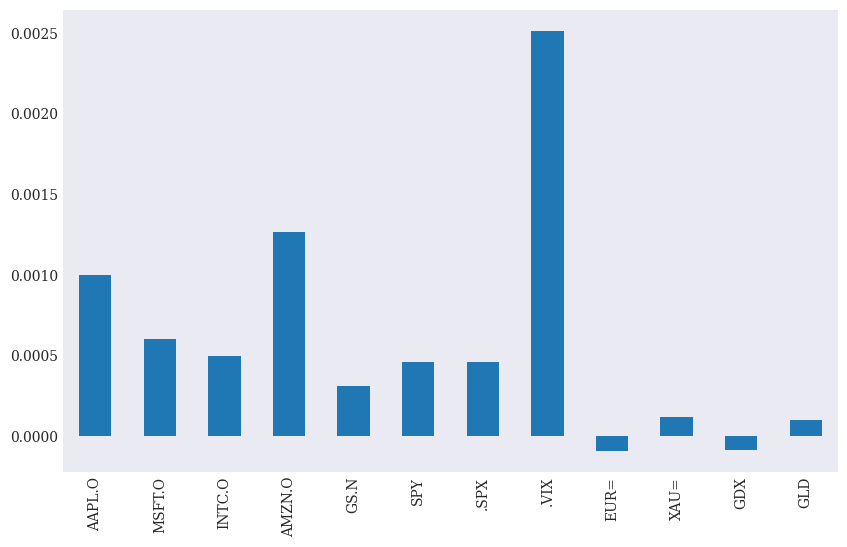

In [20]:
data.pct_change().mean().plot(kind = 'bar', figsize = (10,6));

#### **Log Returns**

**Logarithmic (log) returns** of time series data are the standard means to analyze returns on investments over time. 

The formula is given by
$$
\text{Log Return} = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

In `pandas`, the denominator naturally obtains by shifting data by one row using the `.shift()` method.

In [21]:
rets = np.log(data / data.shift(1))

In [22]:
rets.head().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.00,0.00,-0.00,0.01,0.02,0.0,0.0,-0.04,-0.00,-0.00,0.01,-0.00
2010-01-06,-0.02,-0.01,-0.00,-0.02,-0.01,0.0,0.0,-0.01,0.00,0.02,0.02,0.02
2010-01-07,-0.00,-0.01,-0.01,-0.02,0.02,0.0,0.0,-0.01,-0.01,-0.01,-0.00,-0.01
2010-01-08,0.01,0.01,0.01,0.03,-0.02,0.0,0.0,-0.05,0.01,0.00,0.01,0.00


**Cumulative returns** over a period are obtained by summing up the log returns for each interval and then exponentiate the result:

$$
\text{Cumulative Return} = e^{\sum \text{Log Returns}}
$$

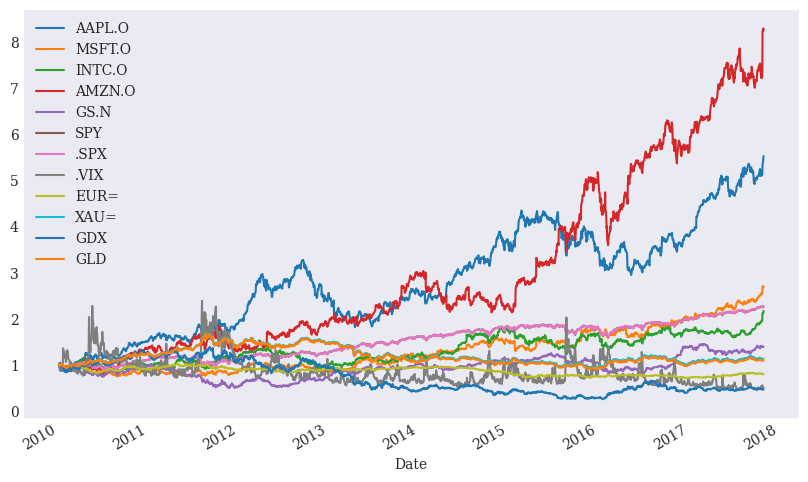

In [23]:
rets.cumsum().apply(np.exp).plot(figsize = (10,6));

### 2.4 Resampling

**Resampling** of financial time series data refers to the process of **converting the frequency of data points** in a time series.

The `resample()` method in `pandas` is used to change the frequency of time series data. 

```python 
    data.resample(rule, label='right', closed='right', kind='timestamp')
```

Parameters:

1. `rule`: This is a required parameter and specifies the new frequency for resampling. Some common time-based frequency strings are:
    - `'D'`: Day
    - `'W'`: Week
    - `'M'`: Month
    - `'Q'`: Quarter
    - `'A'`: Year
One can also specify intervals like '5min', '15T' (15 minutes), '3H' (3 hours), etc.

2. `label`: Determines how the timestamp labels in the resulting data are aligned:
    - `'right'`: Assigns the label to the end of the resampling period (e.g., a week ending on Sunday will be labeled as Sunday).
    - `'left'`: Assigns the label to the beginning of the resampling period (e.g., the first day of the week).
    

3. `closed`: Specifies which side of each interval is closed:
    - `'right'`: The interval includes the right endpoint.
    - `'left'`: The interval includes the left endpoint.

4. `kind`: Defines the type of index used:
    - `'timestamp'`: Generates a DatetimeIndex.
    - `'period'`: Generates a PeriodIndex.

    
**Aggregation functions**: After resampling, you can apply an aggregation method directly, like `mean()`, `sum()`, `last()`, `first()`, `count()`, etc. These specify how to aggregate data within each new time interval.

In [24]:
data.resample('1W', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


In [25]:
# Resample to quarterly data, labeling periods at the start of the quarter
data.resample('QE', label='left').mean().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2009-12-31,30.122098,29.254115,20.850836,125.804541,164.081639,112.546607,1123.593607,20.149672,1.382338,1109.900820,44.881902,108.738459
2010-03-31,36.391239,27.977135,21.917363,130.020095,148.985873,113.694198,1134.584921,26.391429,1.271935,1196.456190,49.862546,117.159690
2010-06-30,37.129258,24.790383,19.658259,130.454059,146.242969,109.856767,1096.246875,24.283594,1.293530,1226.698906,51.520945,120.021523
2010-09-30,44.500887,26.330313,20.678320,169.520000,161.686406,120.645516,1204.585625,19.318437,1.358853,1369.649375,59.041938,133.778188
2010-12-31,49.383274,26.989895,21.107540,176.948145,164.398387,130.385081,1302.528871,18.614839,1.370015,1386.920645,57.362411,135.333395


In [26]:
data.resample('1ME', label = 'right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2267,1213.81,49.86,118.881


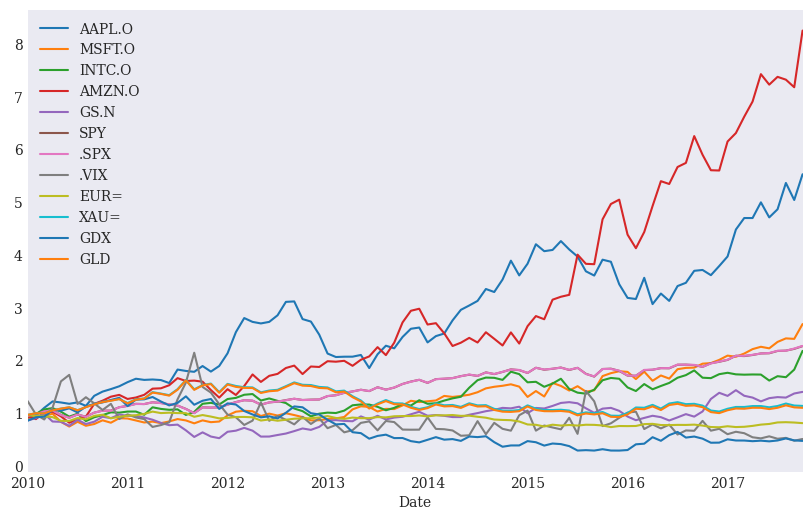

In [27]:
rets.cumsum().apply(np.exp).resample('1ME', label='right').last().plot(figsize=(10, 6));

## 3. Rolling statistics

A **rolling window** is a technique used to **apply a calculation to a specific, fixed-size subset** of data, which “rolls” or **moves across a dataset** as a window. 

The purpose of a rolling window is to compute statistics, like the mean or standard deviation, for consecutive subsets of data points, creating a dynamic, time-dependent **view of trends, averages, or variability**. 

This technique is commonly used in time series analysis, especially in finance, to **understand patterns over time while smoothing out short-term fluctuations**.

In `Python`, the `.rolling()` method in `pandas` is used to apply a rolling window to a `DataFrame` or `Series`. 

This method returns a **“rolling” object** that can apply various aggregation functions, like `.mean()`, `.std()`, `.min()`, etc., over the rolling window.

```python
    data.rolling(window=window_size).function()
```

In [28]:
# Let's focus on a single financial time series
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2017-10-25,156.41
2017-10-26,157.41
2017-10-27,163.05
2017-10-30,166.72
2017-10-31,169.04


In [29]:
window = 20

**- Calculate rolling minimum (`min`) and maximum (`max`):** identify the range of prices over the past 20 days. 

In [30]:
data['min'] = data[sym].rolling(window=window).min()

In [31]:
data['max'] = data[sym].rolling(window=window).max()

**- Calculate rolling mean (`mean`) and standard deviation (`std`):** The rolling mean provides a smoothed version of the price series. It smooths out short-term fluctuations, highlighting the medium-term trend. The standard deviation statistic shows the volatility of the stock price over each 20-day period.

In [32]:
data['mean'] = data[sym].rolling(window=window).mean()

In [33]:
data['std'] = data[sym].rolling(window=window).std()

In [34]:
data['median'] = data[sym].rolling(window=window).median()

**- Calculate Exponentially Weighted Moving Average (`ewma`):** Unlike a simple moving average, which weights all points equally, the **EWMA** gives more importance to recent observations, allowing it to react faster to recent price changes. The `halflife` parameter controls how quickly the weights decay, with a shorter halflife emphasizing more recent data.

In [35]:
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()

In [36]:
data.head(25)

,AAPL.O,min,max,mean,std,median,ewma
Date,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.015684,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,29.674256,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-13,30.092827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-14,29.918542,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data.dropna().head()

,AAPL.O,min,max,mean,std,median,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,30.719969,29.580892,0.933650,29.821542,27.805432
2010-02-02,27.979972,27.437544,30.719969,29.451249,0.968048,29.711113,27.936337
2010-02-03,28.461400,27.437544,30.719969,29.343035,0.950665,29.685970,28.330134
2010-02-04,27.435687,27.435687,30.719969,29.207892,1.021129,29.547113,27.659299
2010-02-05,27.922829,27.435687,30.719969,29.099892,1.037811,29.419256,27.856947


**- Plotting the Rolling Statistics:**

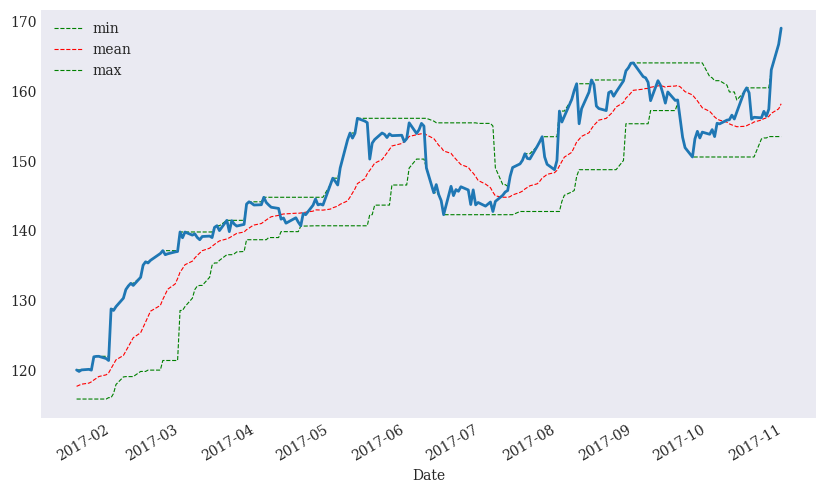

In [40]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize = (10,6), style = ['g--', 'r--', 'g--'], lw = 0.8)
data[sym].iloc[-200:].plot(ax = ax, lw = 2.0) ;

#### Technical Analysis Example: SMAs 

A decades-old trading strategy based on technical analysis is using **two simple moving averages** (SMAs): 

Trading strategy
- Go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA 
- Go short when the opposite holds true. 

In [41]:
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()

In [42]:
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2017-10-25,156.41,157.610952,139.862520
2017-10-26,157.41,157.514286,140.028472
2017-10-27,163.05,157.517619,140.221210
2017-10-30,166.72,157.597857,140.431528
2017-10-31,169.04,157.717857,140.651766


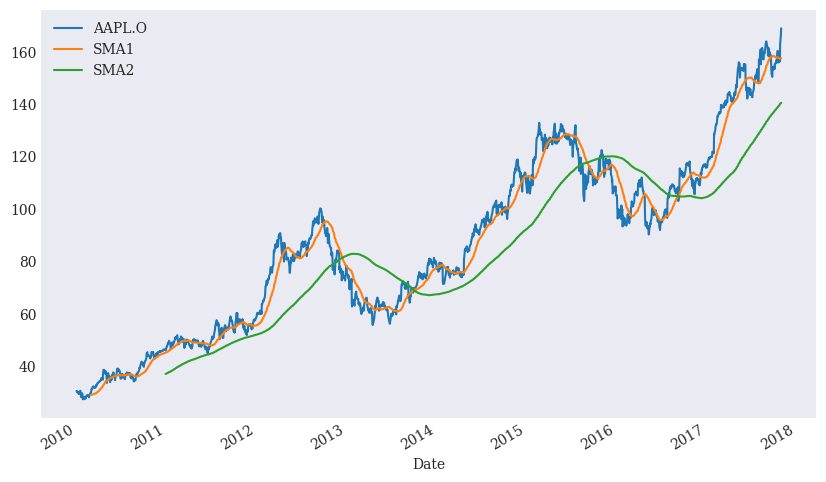

In [43]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6));

SMAs are then used to derive positions to implement a trading strategy. 

Denote
- a long position by a value of 1 
- a short position by a value of -1. 

The change in the position is triggered by a crossover of the two lines representing the SMA time series:

In [44]:
data.dropna(inplace = True)

In [45]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

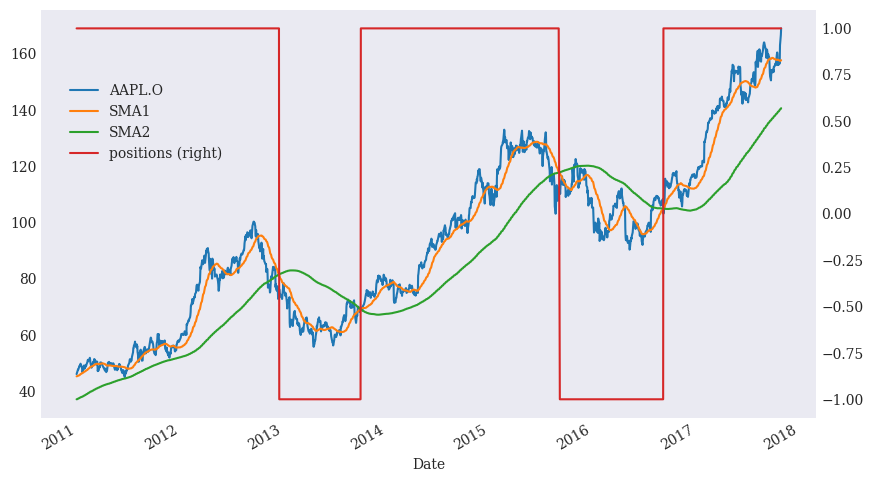

In [46]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(
    figsize = (10,6), secondary_y = 'positions')
ax.get_legend().set_bbox_to_anchor((0.25,0.85));

## 4. Correlation analysis

### 4.1 Inspection of 2 timeseries

Let us consider the correlation analysis between two financial time series: the **S&P 500 Index** (.SPX) and the **VIX volatility index** (.VIX). 
- The S&P 500 is a benchmark index for U.S. stocks
- the VIX measures market volatility expectations. 

Typically, these indices have an inverse relationship: when the S&P 500 falls, the VIX tends to rise, indicating higher market fear or uncertainty.

In [47]:
raw = pd.read_csv(file_path + file_name, index_col=0, parse_dates=True)

In [48]:
data = raw[['.SPX', '.VIX']].dropna()

In [49]:
data.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


##### Visual inspection

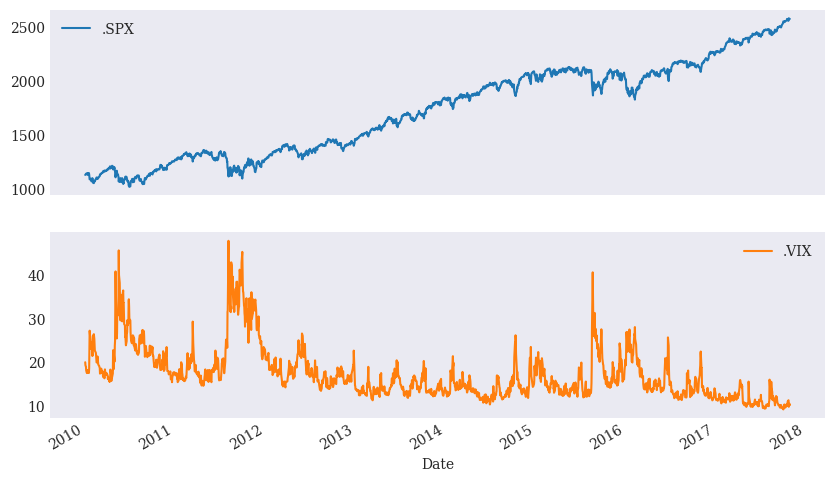

In [50]:
data.plot(subplots=True, figsize=(10, 6));

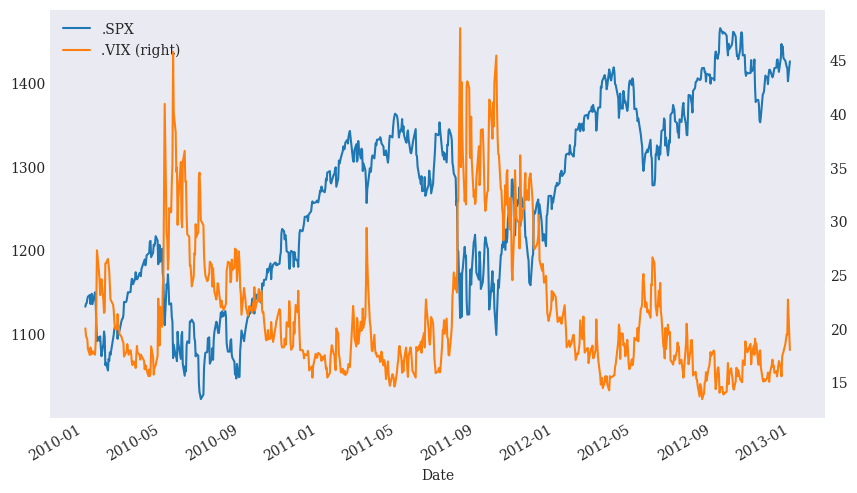

In [51]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));

### 4.2 Logarithmic Returns

#### Producing and processing output

In [52]:
rets = np.log(data / data.shift(1))

In [53]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [54]:
rets.dropna(inplace=True)

#### Visual inspection

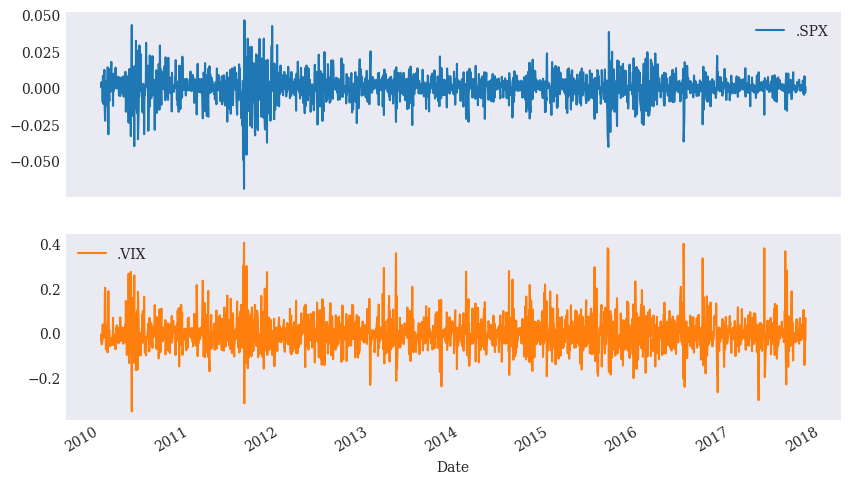

In [55]:
rets.plot(subplots=True, figsize=(10, 6));

The `.plotting.scatter_matrix()` produces correlation analysis plots within and across timeseries.

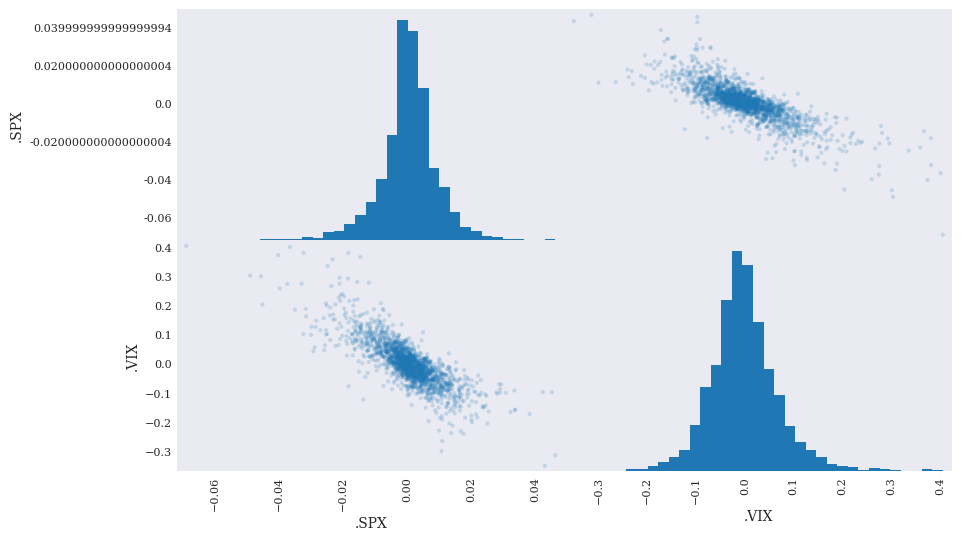

In [56]:
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6));

### 4.3 OLS Regression

**Ordinary Least Square** regression provide a formal way to inspect the correlation between two variables. 

`np.polyfit()` is a function in `NumPy` that fits a polynomial to a set of data points using least squares regression and returns the coeficient. 

In other words, it finds the polynomial function of a specified degree that best fits the data in terms of minimizing the sum of squared errors between the fitted polynomial values and the actual data points

```python
    np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```

Parameters:
- `x`: The x-coordinates (independent variable) of the data points.
- `y`: The y-coordinates (dependent variable) of the data points.
- `deg`: Degree of the polynomial to be fit to the data. For example:
    - `deg=1` fits a line (linear regression),
    - `deg=2` fits a quadratic curve, and so on.
- `cov` (optional): If `True`, the function also returns the covariance matrix of the polynomial coefficients.

In [57]:
reg, cov_matrix = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1, cov=True)
print (f"The regression results in: VIX = {reg[0].round(2)} SPX + {reg[1].round(4)}")
# print (cov_matrix)

The regression results in: VIX = -6.45 SPX + 0.0023


##### Visual inspection

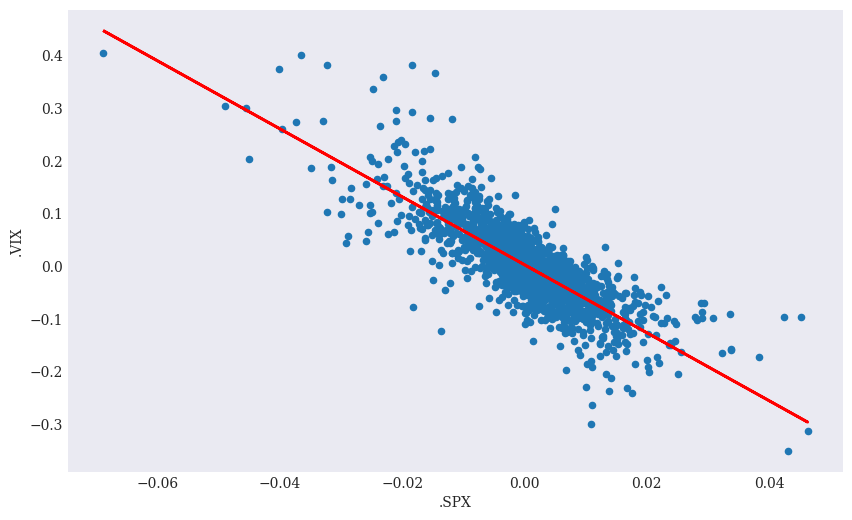

In [58]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);

where `np.polyval()` is a function in `NumPy` used to evaluate (calculate) the value of a polynomial for a given set of values. Essentially, given a polynomial’s coefficients, `np.polyval` compute the y-values for corresponding x-values on that polynomial.

```python
    np.polyval(p, x)
```

- `p`: Array of polynomial coefficients in decreasing order of power. 
    - For example, for a polynomial equation of the form  $y = ax^2 + bx + c$ , the coefficients array should be [$a, b, c$].
- `x`: Value(s) at which to evaluate the polynomial. This can be a single number or an array of x-values.


### 4.4 Correlation

`.corr()` computes the **Pearson correlation** coefficient between pairs of columns in a `DataFrame`, a measure of the strength and direction of their linear relationship.
- Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation). 
    - For .SPX and .VIX, a strong negative correlation is expected.
    
- Calling the method can be 
    - applied directly to a `DataFrame` to calculate correlations between each column pair.
    - used with one column to calculate correlation with another column, e.g., `df['col1'].corr(df['col2'])`.


In [59]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


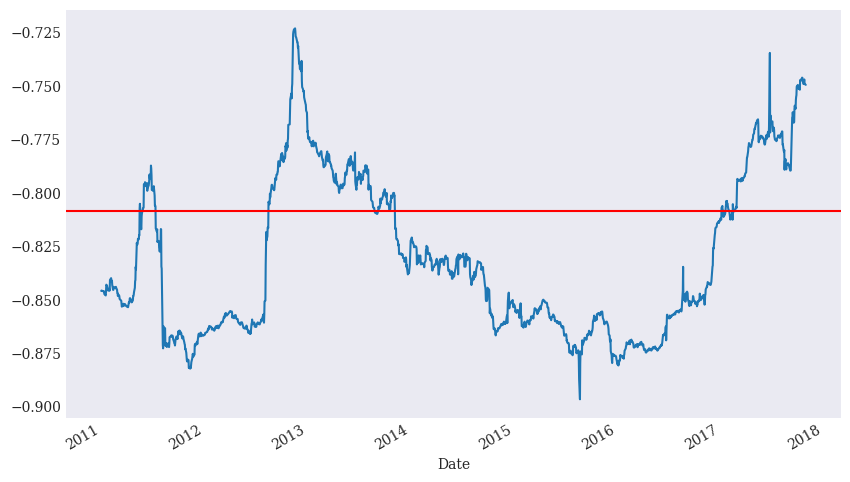

In [60]:
ax = rets['.SPX'].rolling(window=252).corr(
    rets['.VIX']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r');

## 5. A glimpse into high-frequency data

**High-frequency data** in finance refers to data captured at very short time intervals, often seconds or milliseconds, typically related to trades, bids, and asks. 

It provides detailed insights into market activity but requires careful handling due to its high volume and potential noise. Such data is commonly used in trading, market analysis, and to identify short-term price movements or anomalies.

For this part, we’re loading **tick** data from a `csv` file for **EUR/USD**, which contains high-frequency information, like **bid** and **ask prices**, captured by the **FXCM broker**.

The following parameters apply:
```python
    file_path = 'Data/11/'
    file_name = 'fxcm_eur_usd_tick_data.csv'
```

#### Check file

In [61]:
file_path = 'Data/11/'
file_name = 'fxcm_eur_usd_tick_data.csv'
file = open(file_path + file_name, 'r')

In [62]:
file.readlines()[:10]

[',Bid,Ask\n',
 '2017-11-10 12:00:00.007,1.16395,1.16394\n',
 '2017-11-10 12:00:00.053,1.16394,1.16394\n',
 '2017-11-10 12:00:00.740,1.16394,1.16393\n',
 '2017-11-10 12:00:00.746,1.16394,1.16391\n',
 '2017-11-10 12:00:00.756,1.16394,1.16392\n',
 '2017-11-10 12:00:00.761,1.16393,1.16392\n',
 '2017-11-10 12:00:00.772,1.16393,1.16391\n',
 '2017-11-10 12:00:00.783,1.16391,1.16391\n',
 '2017-11-10 12:00:00.819,1.16391,1.16392\n']

In [63]:
file.close()

#### Import and inspect data

In [64]:
tick = pd.read_csv(file_path + file_name,
                   index_col=0, parse_dates=True)

In [65]:
tick.head()

,Bid,Ask
2017-11-10 12:00:00.007,1.16395,1.16394
2017-11-10 12:00:00.053,1.16394,1.16394
2017-11-10 12:00:00.740,1.16394,1.16393
2017-11-10 12:00:00.746,1.16394,1.16391
2017-11-10 12:00:00.756,1.16394,1.16392


In [66]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17352 entries, 2017-11-10 12:00:00.007000 to 2017-11-10 14:00:00.131000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bid     17352 non-null  float64
 1   Ask     17352 non-null  float64
dtypes: float64(2)
memory usage: 406.7 KB


#### Compute mid-prices

$$
\text{Mid Price} = \frac{\text{Bid} + \text{Ask}}{2}
$$

In [67]:
tick['Mid'] = tick.mean(axis = 1)

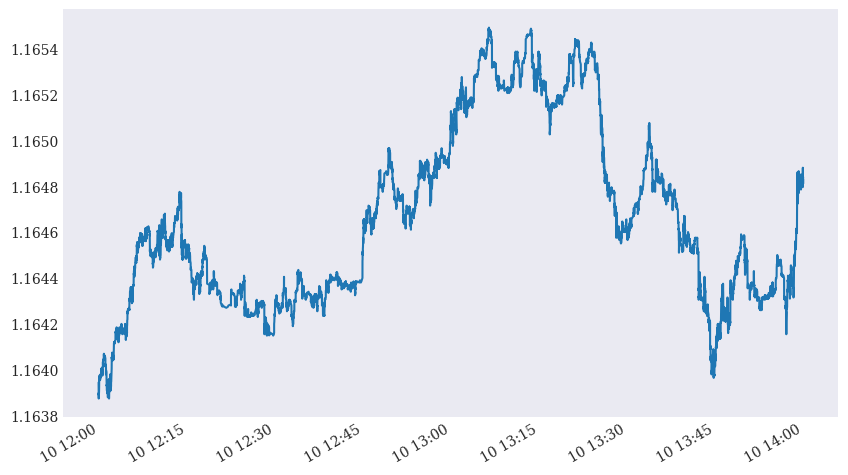

In [68]:
tick['Mid'].plot(figsize = (10,6));

#### Resampling to 5-minute intervals

In [69]:
tick_resam = tick.resample(rule='5min', label='right').last()

In [70]:
tick_resam.head()

,Bid,Ask,Mid
2017-11-10 12:05:00,1.16425,1.16427,1.164260
2017-11-10 12:10:00,1.16454,1.16455,1.164545
2017-11-10 12:15:00,1.16449,1.16449,1.164490
2017-11-10 12:20:00,1.16437,1.16437,1.164370
2017-11-10 12:25:00,1.16429,1.16430,1.164295


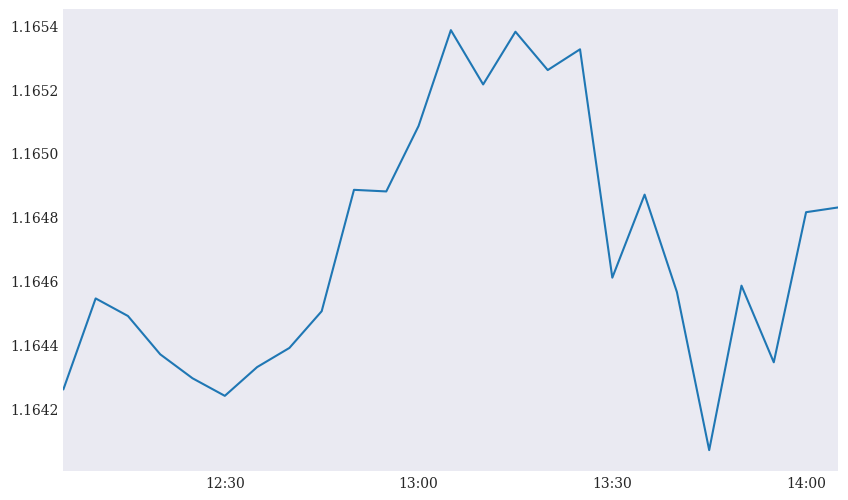

In [71]:
tick_resam['Mid'].plot(figsize=(10, 6));

---